# <span style='color:green'> Credit Card Approval Prediction </span>

### Project Overview:

A bank's credit card department is one of the top adopters of data science. A top focus for the bank has always been acquiring new credit card customers. Giving out credit cards without doing proper research or evaluating applicants' creditworthiness is quite risky. The credit card department has been using a data-driven system for credit assessment called Credit Scoring for many years, and the model is known as an application scorecard. A credit card application's cutoff value is determined using the application scorecard, which also aids in estimating the applicant's level of risk. This decision is made based on strategic priority at a given time
	Customers must fill out a form, either physically or online, to apply for a credit card. The application data is used to evaluate the applicant's creditworthiness. The decision is made using the application data in addition to the Credit Bureau Score, such as the FICO Score in the US or the CIBIL Score in India, and other internal information on the applicants. Additionally, the banks are rapidly taking a lot of outside data into account to enhance the caliber of credit judgements.


### Project Objective: 

The main objective of this assignment is to minimize the risk and maximize the profit of the bank.
Bank has to make a decision based on the applicant's profile to minimize the loss from the bank's perspective.
Bank considers the applicant's over their nature of work, income range and family orientaion details to take any 
decision to approve or reject a credit card application. The customer Credit card data contains many features and a 
classification approach to identify the credit worthiness of an applicant.

In this project we are utilizing the exploratory data analysis (EDA) as a data exploration technique to acquire 
knowledge, discover new relations, apply new methodologies and unravel patterns in data. It is important to apply 
the necessary rationale behind each step to address the main objective of the study.

So, The primary objective of this project is to develop a machine learning model for Credit Card Approval Prediction.


## Feature Understanding

Dataset name: (Credit_Card.csv)

- Ind_ID: Client ID
- Gender: Gender information
- Car_owner: Having car or not
- Propert_owner: Having property or not
- Children: Count of children
- Annual_income: Annual income
- Type_Income: Income type
- Education: Education level
- Marital_status: Marital_status
- Housing_type: Living style
- Birthday_count: Use backward count from current day (0), -1 means yesterday.
- Employed_days: Start date of employment. Use backward count from current day (0). Positive value means, individual is currently unemployed.
- Mobile_phone: Any mobile phone
- Work_phone: Any work phone
- Phone: Any phone number
- EMAIL_ID: Any email ID
- Type_Occupation: Occupation
- Family_Members: Family size

Another data set (Credit_card_label.csv) contains two key pieces of information
- ID: The joining key between application data and credit status data, same is Ind_ID
- Label: 0 is application approved and 1 is application rejected.

### Required Libraries

In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

### Import Datasets

In [149]:
credit_card=pd.read_csv('Credit_card.csv')
credit_card_label=pd.read_csv('Credit_card_label.csv')

In [150]:
credit_card.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5056149,M,Y,N,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-23424.0,-14887,1,0,0,0,Laborers,2
1,5090386,F,N,Y,0,247500.0,Commercial associate,Higher education,Single / not married,House / apartment,-21537.0,-13735,1,0,0,0,Core staff,1
2,5033628,F,N,Y,0,166500.0,State servant,Higher education,Married,House / apartment,-23599.0,-13382,1,0,0,0,NaN,2
3,5126108,F,N,Y,0,112500.0,State servant,Secondary / secondary special,Single / not married,House / apartment,-20577.0,-13010,1,1,0,0,Core staff,1
4,5112599,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,-22466.0,-12870,1,1,1,0,Managers,2


In [151]:
credit_card_label.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


### Merging Both DataSets Using Pandas Merge Function

In [153]:
data=pd.merge(credit_card,credit_card_label,on='Ind_ID',how='inner')

In [154]:
df=data.copy()

In [155]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5056149,M,Y,N,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,-23424.0,-14887,1,0,0,0,Laborers,2,0
1,5090386,F,N,Y,0,247500.0,Commercial associate,Higher education,Single / not married,House / apartment,-21537.0,-13735,1,0,0,0,Core staff,1,0
2,5033628,F,N,Y,0,166500.0,State servant,Higher education,Married,House / apartment,-23599.0,-13382,1,0,0,0,NaN,2,0
3,5126108,F,N,Y,0,112500.0,State servant,Secondary / secondary special,Single / not married,House / apartment,-20577.0,-13010,1,1,0,0,Core staff,1,0
4,5112599,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,-22466.0,-12870,1,1,1,0,Managers,2,0


### Shape of DataFrame

In [157]:
print(f"Total Number of Rows in Dataset={df.shape[0]}")
print(f'Total Number of Columns in Dataset={df.shape[1]}')

Total Number of Rows in Dataset=1548
Total Number of Columns in Dataset=19


#### 
- **We can see that, dataset contains 1548 rows and 19 colmns.**

## Data Exploration

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

**We can gather valuable Information about the dataset.**

- **Dataset contains 1548 entries(Rows) and there are 19 columns in the Dataset.**
- **Out of 19 columns, 11 columns are Numerical Columns and 8 Columns are Categorical Columns.**
- **Several columns are having missing value including GENDER, Annual_income, Birthday_count and Type_Occupation.**

## Spliting columns by data types

### Categorical Columns

In [165]:
categorical_columns=df.select_dtypes(include='object').columns
for i in categorical_columns:
    print(i)

GENDER
Car_Owner
Propert_Owner
Type_Income
EDUCATION
Marital_status
Housing_type
Type_Occupation


### Numerical_Columns

In [167]:
numerical_columns=df.select_dtypes(include='number').columns
for i in numerical_columns:
    print(i)

Ind_ID
CHILDREN
Annual_income
Birthday_count
Employed_days
Mobile_phone
Work_Phone
Phone
EMAIL_ID
Family_Members
label


## Checking Null Values In Dataset

In [169]:
df.isnull().sum()/len(df)*100

Ind_ID              0.000000
GENDER              0.452196
Car_Owner           0.000000
Propert_Owner       0.000000
CHILDREN            0.000000
Annual_income       1.485788
Type_Income         0.000000
EDUCATION           0.000000
Marital_status      0.000000
Housing_type        0.000000
Birthday_count      1.421189
Employed_days       0.000000
Mobile_phone        0.000000
Work_Phone          0.000000
Phone               0.000000
EMAIL_ID            0.000000
Type_Occupation    31.524548
Family_Members      0.000000
label               0.000000
dtype: float64

#### Here we can see

- **Gender: 0.45% missing values**
- **Annual_income: 1.49% missing values**
- **Birthday_count: 1.42% missing values**
- **Type_Occupation: 31.52% missing values**

## Drop Unnecessery Columns

- **The Features Mobile_phone, Work_Phone, Phone, EMAIL_ID are present in the dataset but these columns are unnecessary for data analysis. Drop these unnecessary columns.**
- **Type_Occupation contains 31.52% nulls values thats why we consider removing it**.

In [174]:
df.drop(columns=["Mobile_phone", "Work_Phone", "Phone", "EMAIL_ID",'Type_Occupation'],axis=1,inplace=True)

In [175]:
df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Family_Members',
       'label'],
      dtype='object')

### Feature Engineering

#### Calculte the approx age of customers using Birthday count:

In [178]:
import math
Age=[]
for i in df['Birthday_count']:
    if not math.isnan(i):
        a=i/365
        Age.append(round(abs(a)))
    else:
        Age.append(np.nan)
df['Age']=Age

### Creating an 'Emmployed_Status' Feature from 'Employed_days'

In [183]:
Employed_Status=[]
for i in df['Employed_days']:
    if i<0:
        Employed_Status.append('Employed')
    else:
        Employed_Status.append('Unemployed')
df['Employed_Status']=Employed_Status

In [184]:
df.drop(columns=['Birthday_count','Employed_days'],axis=1,inplace=True)

In [185]:
df.rename(columns={'label':'Approved_status'},inplace=True)

In [186]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Family_Members,Approved_status,Age,Employed_Status
0,5056149,M,Y,N,0,157500.0,Working,Secondary / secondary special,Married,House / apartment,2,0,64.0,Employed
1,5090386,F,N,Y,0,247500.0,Commercial associate,Higher education,Single / not married,House / apartment,1,0,59.0,Employed
2,5033628,F,N,Y,0,166500.0,State servant,Higher education,Married,House / apartment,2,0,65.0,Employed
3,5126108,F,N,Y,0,112500.0,State servant,Secondary / secondary special,Single / not married,House / apartment,1,0,56.0,Employed
4,5112599,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,2,0,62.0,Employed


- **Now we have 14 Features to Analysis**

## Overall Statistics about the Dataset

In [189]:
df.describe()

,Ind_ID,CHILDREN,Annual_income,Family_Members,Approved_status,Age
count,1.548000e+03,1548.000000,1.525000e+03,1548.000000,1548.000000,1526.000000
mean,5.078920e+06,0.412791,1.913993e+05,2.161499,0.113049,43.952818
std,4.171759e+04,0.776691,1.132530e+05,0.947772,0.316755,11.603295
min,5.008827e+06,0.000000,3.375000e+04,1.000000,0.000000,21.000000
25%,5.045070e+06,0.000000,1.215000e+05,2.000000,0.000000,34.000000
50%,5.078842e+06,0.000000,1.665000e+05,2.000000,0.000000,43.000000
75%,5.115673e+06,1.000000,2.250000e+05,3.000000,0.000000,54.000000
max,5.150412e+06,14.000000,1.575000e+06,15.000000,1.000000,68.000000


## Data Summary Report

- **The average income is approximetly 1,91,399.30,with a standard deviation of 1,13,253.0, suggesting a wide income distribution.**
- **The minimum and maximum Annual_income are 33,750.00 and 1,57,500.0.**
- **The Range of age is between 21 years to 68 years and average age of customers is approx 44 years.**

In [192]:
df.describe(include='object')

,GENDER,Car_Owner,Propert_Owner,Type_Income,EDUCATION,Marital_status,Housing_type,Employed_Status
count,1541,1548,1548,1548,1548,1548,1548,1548
unique,2,2,2,4,5,5,6,2
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Employed
freq,973,924,1010,798,1031,1049,1380,1287


### **Data Summary**

- **In Dataset most of the customers are not having car. means, they are not car owners.**
- **In dataset most of the customers are married and their education is Secondary/secondary special.**
- **There is most of the customers are Employed, Working and living in House/apartment.**
- **And, Most of the customers are Property owner.***

### Check Unique Values in Categorical Columns

In [196]:
categorical_column=df.select_dtypes(include='object').columns
for i in categorical_column:
    print(f"Unique values in {i} column")
    print(df[i].unique())
    print('-'*50)

Unique values in GENDER column
['M' 'F' nan]
--------------------------------------------------
Unique values in Car_Owner column
['Y' 'N']
--------------------------------------------------
Unique values in Propert_Owner column
['N' 'Y']
--------------------------------------------------
Unique values in Type_Income column
['Working' 'Commercial associate' 'State servant' 'Pensioner']
--------------------------------------------------
Unique values in EDUCATION column
['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Academic degree' 'Lower secondary']
--------------------------------------------------
Unique values in Marital_status column
['Married' 'Single / not married' 'Separated' 'Civil marriage' 'Widow']
--------------------------------------------------
Unique values in Housing_type column
['House / apartment' 'Municipal apartment' 'With parents'
 'Co-op apartment' 'Office apartment' 'Rented apartment']
--------------------------------------------------

#### **Gender Column is having nulls values.**

### Modifying categories in categorical columns

In [199]:
Marital_status_mapping={'Married':'Married',
                        'Separated':'Separated',
                        'Civil marriage':'Civil marriage'
                        ,'Single / not married':'not married',
                        'Widow':'Widow'}
df['Marital_status']=df['Marital_status'].map(Marital_status_mapping)

df['Marital_status'].unique()

array(['Married', 'not married', 'Separated', 'Civil marriage', 'Widow'],
      dtype=object)

In [200]:
EDUCATION_mapping={'Higher education':'Higher Education',
                   'Secondary / secondary special':'Secondary Education',
                   'Incomplete higher':'Incomplete Higher',
                   'Lower secondary':'Lower Secondary',
                   'Academic degree':'Academic Degree'}
df['EDUCATION']=df['EDUCATION'].map(EDUCATION_mapping)

df['EDUCATION'].unique()

array(['Secondary Education', 'Higher Education', 'Incomplete Higher',
       'Academic Degree', 'Lower Secondary'], dtype=object)

### Visualizing the Data for Better Understanding

#### Distribution of Numerical Variables

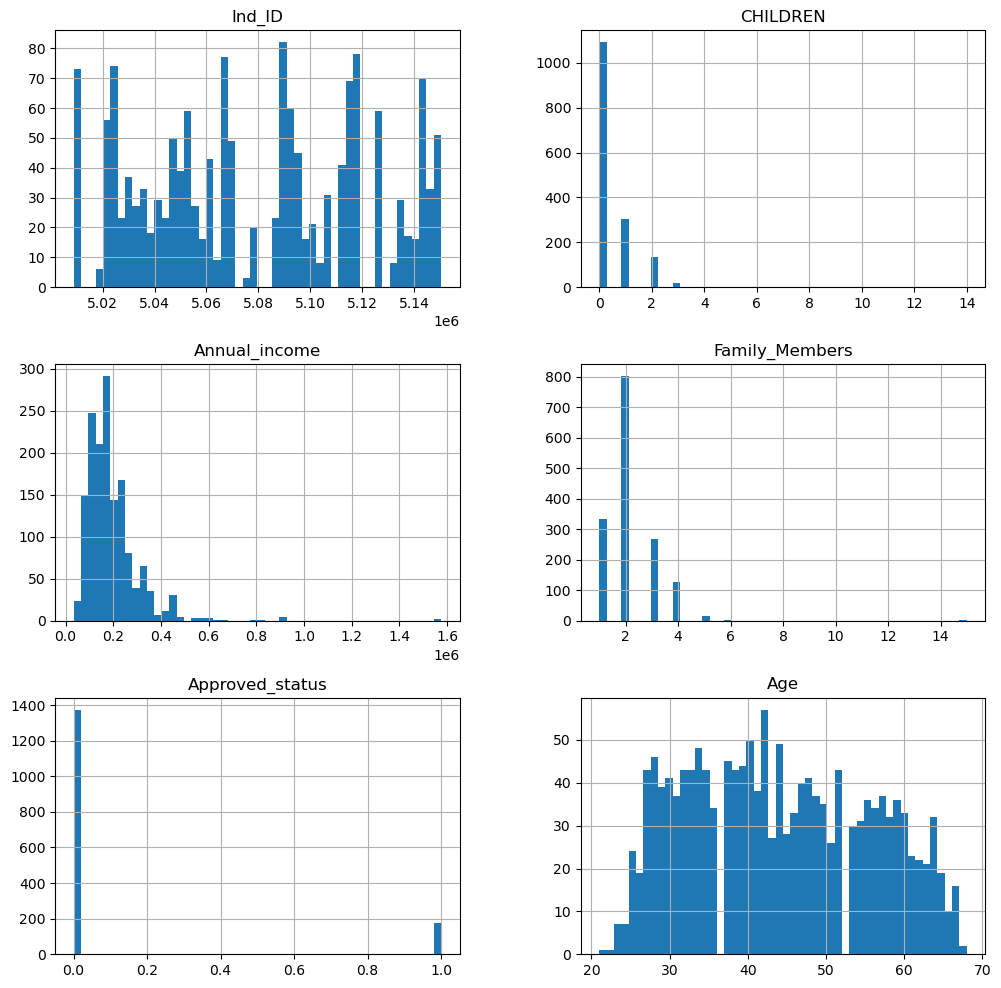

In [223]:
df.hist(bins=50,figsize=(12,12))
plt.show()

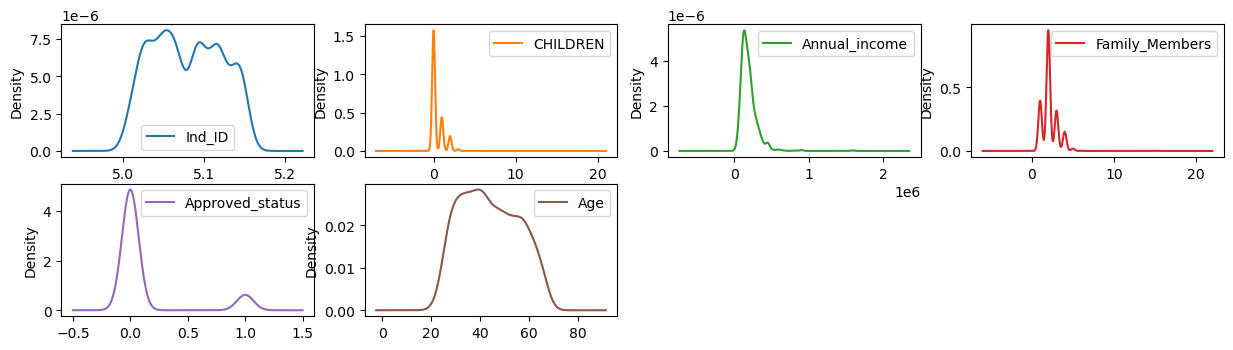

In [224]:
df.plot(kind='density',subplots=True,figsize=(15,10),sharex=False,layout=(5,4))
plt.show()

- **With above visualization we can say that there is zero children customers are more and very less customers has 3 children.**
- **We can see that, max of customers are belongs to less than 40,000 annual income and very less customers are belongs to more than 40,000 annual income.**
- **we can see that,max of customer's family members are couples and very less customer,s family members are above 4.**
- **With above visualization, we can see most of customers are belongs to range of 21 to 68 years age.**

In [226]:
numerical_columns=[]
for i in df.select_dtypes(include='number'):
    numerical_columns.append(i)

In [227]:
numerical_columns

['Ind_ID',
 'CHILDREN',
 'Annual_income',
 'Family_Members',
 'Approved_status',
 'Age']

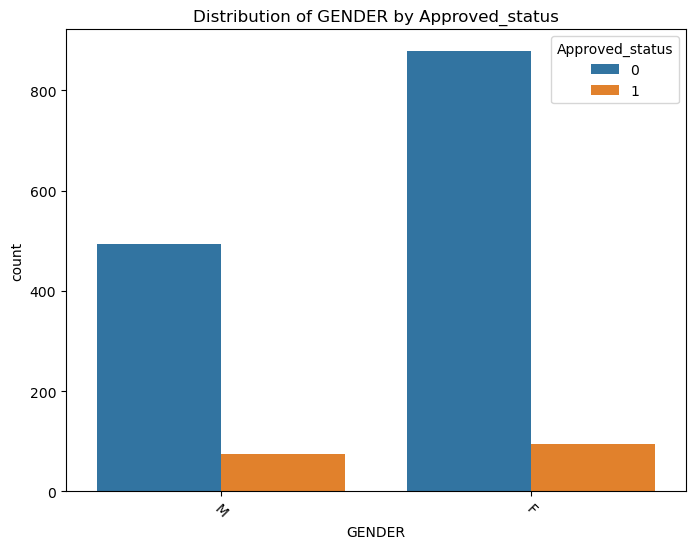

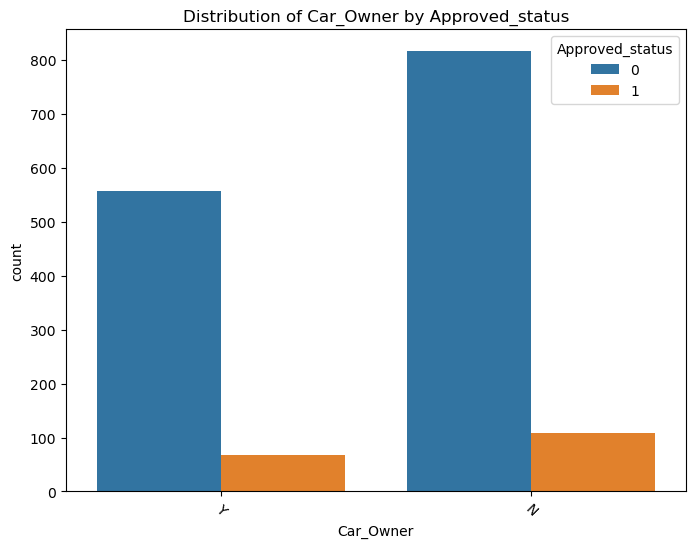

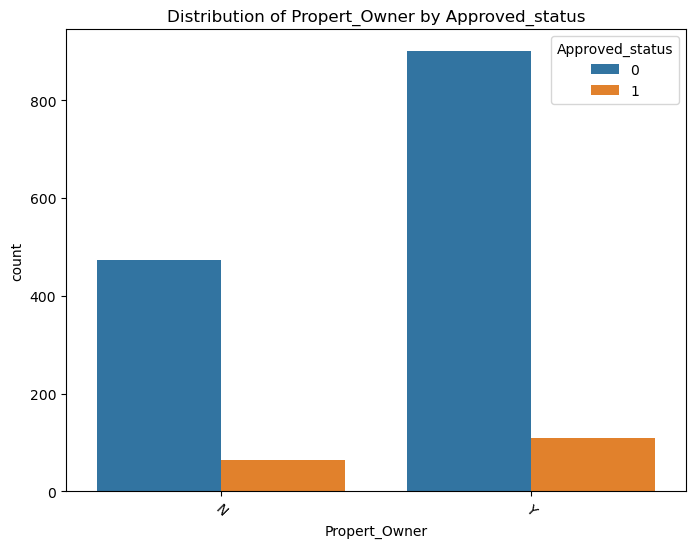

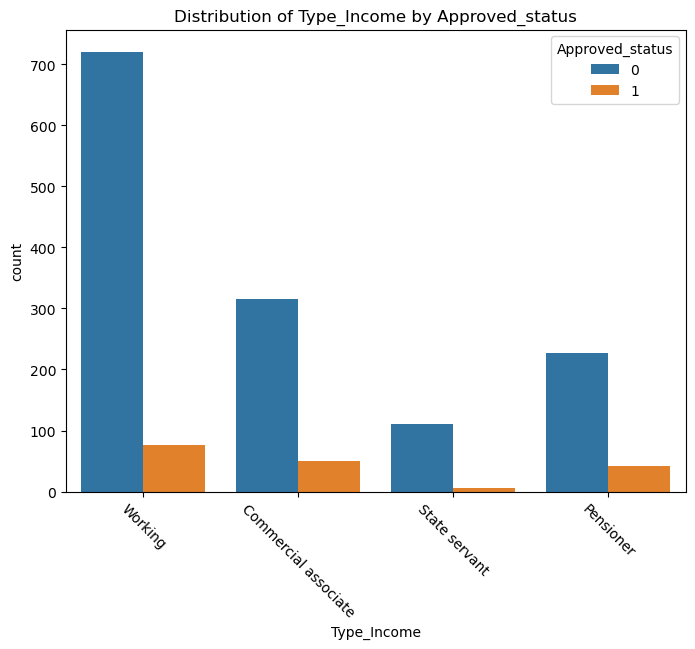

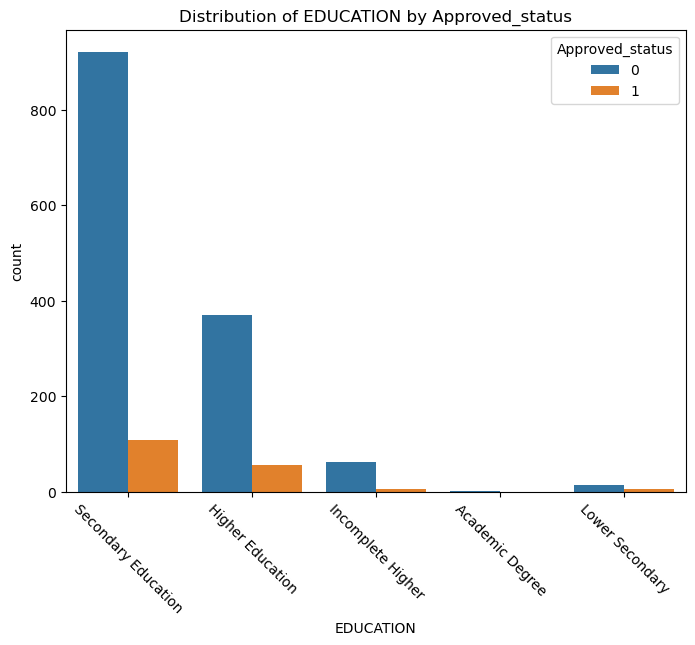

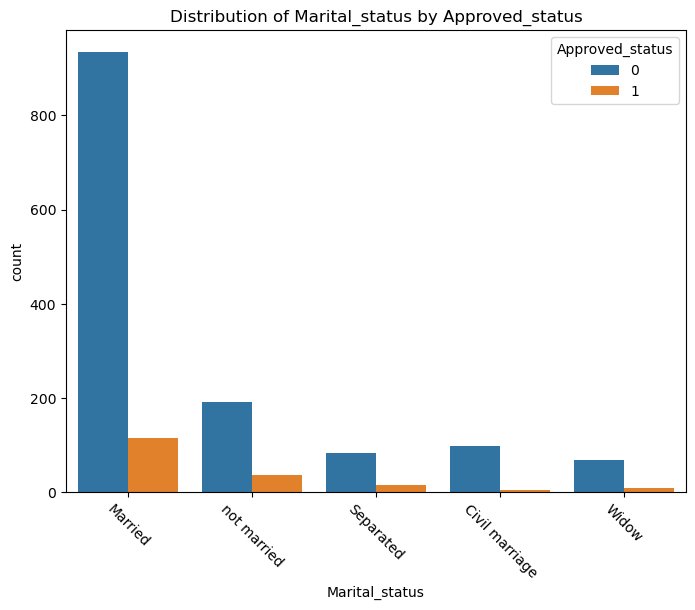

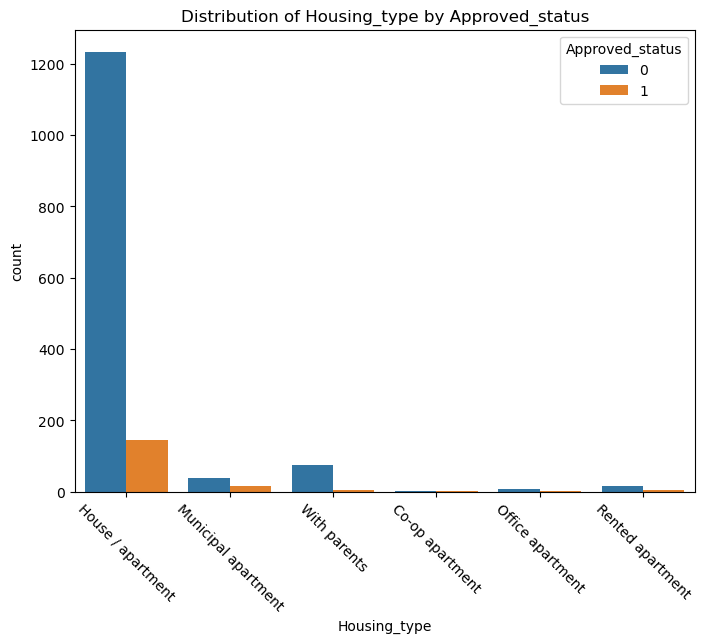

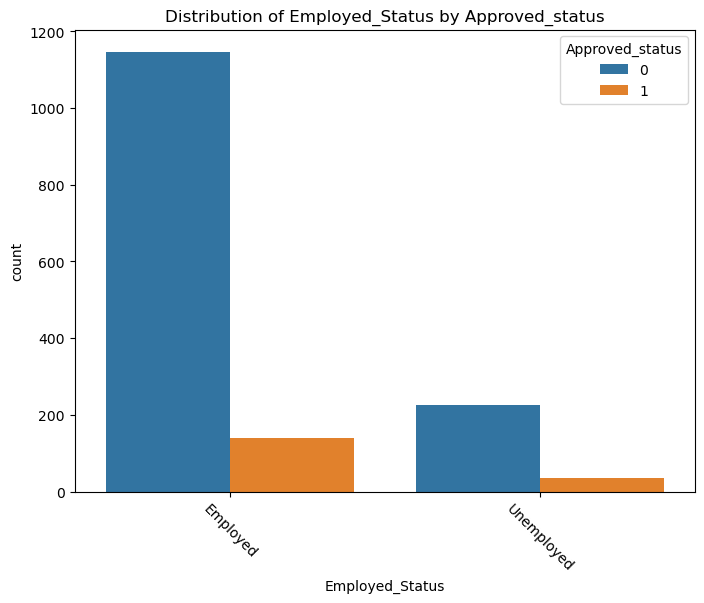

In [228]:
categorical_features=['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION','Marital_status', 'Housing_type', 'Employed_Status']
for feature in categorical_features:
    plt.figure(figsize=(8,6))
    sns.countplot(x=feature,data=df,hue='Approved_status')
    plt.xticks(rotation=-45)
    plt.title(f'Distribution of {feature} by Approved_status')
    plt.show()

### <span style='color:Red'> Boxplot to check Outliers in dataset  </span>

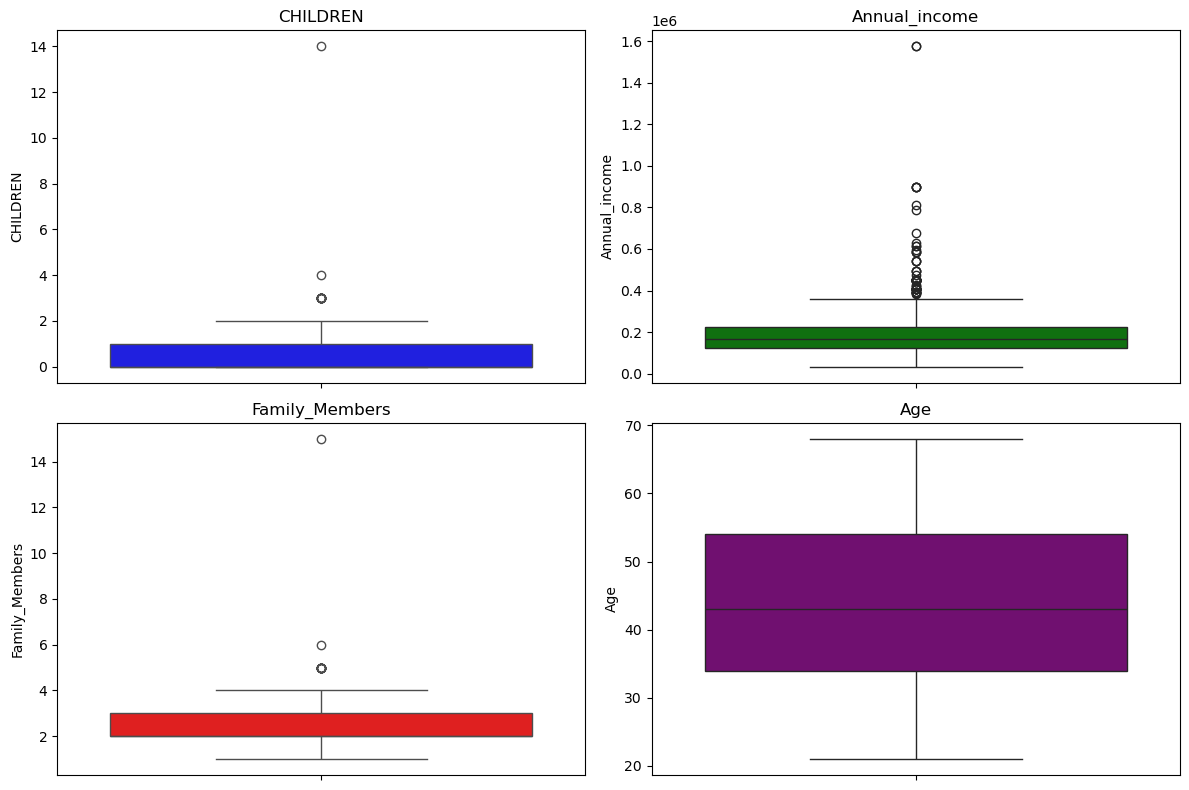

In [230]:
columns_to_plot=['CHILDREN', 'Annual_income','Family_Members','Age']
colors=['blue','green','red','purple']
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(12,8))
for i,column in enumerate(columns_to_plot):
    sns.boxplot(data=df[column],ax=axes[i//2,i%2],palette=[colors[i]])
    axes[i//2,i%2].set_title(column)

plt.tight_layout()
plt.show()

### **So the dataset contains outliers in features like CHILDREN,Annual income and Family_Members**

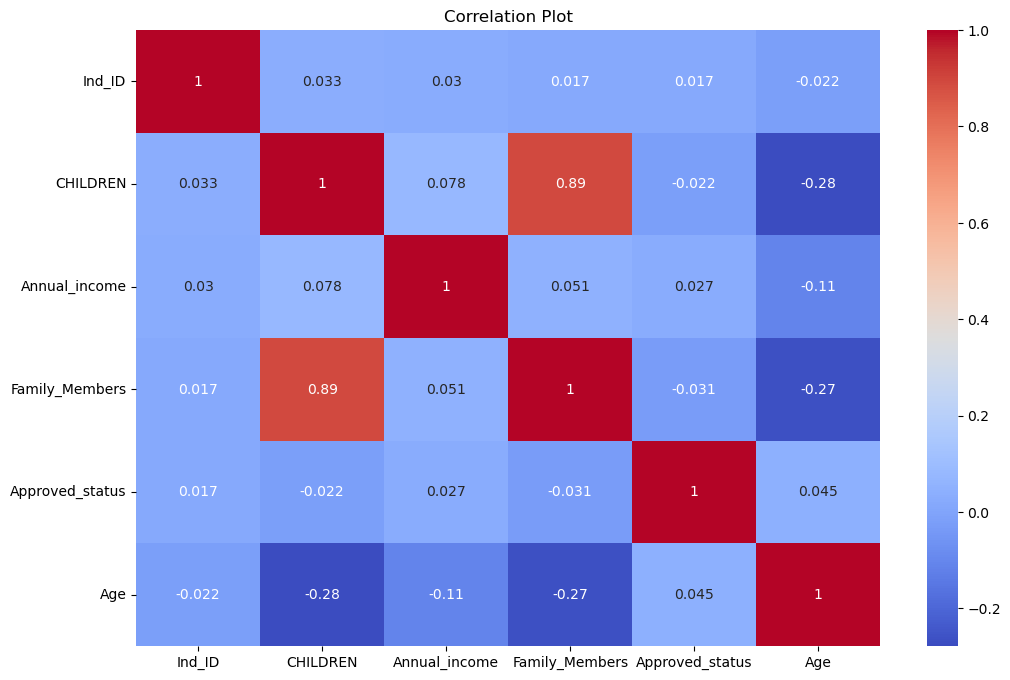

In [232]:
corr_matrix=df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True,fmt='.2g',cmap='coolwarm',linewidths=0,linecolor='black',cbar=True)
plt.title('Correlation Plot')
plt.show()

### It has shown there is a strong correlation between Family_Members and Children.

## Data Preprocessing

### Handling missing values

In [236]:
df.isnull().sum()

Ind_ID              0
GENDER              7
Car_Owner           0
Propert_Owner       0
CHILDREN            0
Annual_income      23
Type_Income         0
EDUCATION           0
Marital_status      0
Housing_type        0
Family_Members      0
Approved_status     0
Age                22
Employed_Status     0
dtype: int64

In [237]:
df['Annual_income']=df['Annual_income'].fillna(df['Annual_income'].median())
df['Age']=df['Age'].fillna(df['Age'].mean())
df['GENDER']=df['GENDER'].fillna(df['GENDER'].mode()[0])

#### Handle Outlier in Dataset

In [239]:
Q1=df['Annual_income'].quantile(0.25)
Q3=df['Annual_income'].quantile(0.75)

IQR=Q3-Q1
Lower_limit=Q1-(1.5*IQR)
Upper_limit=Q3+(1.5*IQR)

df['Annual_income']=df['Annual_income'].clip(Lower_limit,Upper_limit)

In [241]:
df=df.drop(['Ind_ID'],axis=1)

In [242]:
df.columns

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN', 'Annual_income',
       'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type',
       'Family_Members', 'Approved_status', 'Age', 'Employed_Status'],
      dtype='object')

In [243]:
categorical_column

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION',
       'Marital_status', 'Housing_type', 'Employed_Status'],
      dtype='object')

## Dummy Encoding

In [245]:
categorical_column

Index(['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION',
       'Marital_status', 'Housing_type', 'Employed_Status'],
      dtype='object')

In [246]:
XX=pd.get_dummies(df,columns=categorical_column,drop_first=True)

## Seperate Independent Variable X and Dependent Variable Y

In [248]:
X=XX.drop('Approved_status',axis=1)
y=df['Approved_status']

## Split the data in training and testing sets

In [250]:
from sklearn.model_selection import train_test_split

In [251]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=17)

In [252]:
print(len(X_train))
print(len(X_test))

1238
310


## Feature Scaling

In [254]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
x_test=sc.transform(X_test)

In [255]:
print(len(X_train))
print(len((X_test)))

1238
310


## <span style='color:green'> Key Findings</span>

### <span style='color:Red'> Income Type(Working) </span>

- **Customers with a 'Working' Income is more than other Income types and their applications approvals  are more than other type .**

### <span style='color:green'> Marital Status(Married) </span>

- **Married customers are more than other type of Marital status and their applications approval are more than other marital status types.**

### <span style='color:Blue'> Housing Type(House/Apartment) </span>

- **Most of the customers live in House/Apartment and their application approvals are more than other housing types.**

## <span style='color:green'> Final Conclusion </span>

- **When considering all three types together, individual who are working, married and live in House/appartment type there is a higher probability of having their application approved.**

## Modeling

## 1. Logistic Regression

In [288]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train,y_train)

## Prediction
log_pred_train = logistic.predict(X_train)
log_pred_test = logistic.predict(X_test)

## Evaluation
from sklearn.metrics import accuracy_score
log_train_accuracy = accuracy_score(y_train,log_pred_train)*100
log_test_accuracy = accuracy_score(y_test,log_pred_test)*100

from sklearn.model_selection import cross_val_score
log_cv = cross_val_score(logistic,X_test,y_test,cv=5,scoring='accuracy').mean() * 100

print(f"Train accuracy score: {round(log_train_accuracy,2)}%")
print(f"Test accuracy score: {round(log_test_accuracy,2)}%")
print(f'Cross validation score: {round(log_cv,2)}%')

Train accuracy score: 89.98%
Test accuracy score: 13.23%
Cross validation score: 86.45%


## 2. Support Vector Machine hyperparameter tuning

In [105]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

sv_model = SVC()

param_grid = {'C':[0.1,1,10,100],
          "gamma":[1,0.1,0.01,0.001],
          "kernel":['rbf','sigmoid','poly']
         }3
grid_search = GridSearchCV(estimator = sv_model, param_grid=param_grid, cv=5,scoring='accuracy')
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

## 2. Support Vector Machine

In [276]:
from sklearn.svm import SVC
sv_model = SVC(C= 1, gamma= 1, kernel='rbf')
sv_model.fit(X_train,y_train)

# prediction
sv_pred_train = sv_model.predict(X_train)
sv_pred_test = sv_model.predict(X_test)

# Evaluation 
from sklearn.metrics import accuracy_score,confusion_matrix
svm_train_accuracy = accuracy_score(y_train,sv_pred_train)*100
svm_test_accuracy = accuracy_score(y_test,sv_pred_test)*100

from sklearn.model_selection import cross_val_score
svm_cv = cross_val_score(sv_model,X_test,y_test,cv=5,scoring='accuracy').mean()*100

print(f"Train accuracy score: {round(svm_train_accuracy,2)}%")
print(f"Test accuracy score: {round(svm_test_accuracy,2)}%")
print(f'Cross validation score: {round(svm_cv,2)}%')
print('confusion matrix:')
print(confusion_matrix(y_test,sv_pred_test))

Train accuracy score: 94.99%
Test accuracy score: 86.77%
Cross validation score: 88.06%
confusion matrix:
[[269   0]
 [ 41   0]]


## 3. Decision Tree Hyperparameter Tuning

In [109]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier(random_state=15)
param_grid = {'criterion':['gini','entropy'],
             'max_depth':list(range(1,16))}

grid = GridSearchCV(estimator = estimator, param_grid = param_grid, cv =5 , scoring='accuracy')
grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [278]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3)
dt_model.fit(X_train,y_train)

## Prediction
dt_pred_train = dt_model.predict(X_train)
dt_pred_test = dt_model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
dt_train_accuracy = accuracy_score(y_train,dt_pred_train)*100
dt_test_accuracy = accuracy_score(y_test,dt_pred_test)*100

from sklearn.model_selection import cross_val_score
dt_cv = cross_val_score(dt_model,X_test,y_test,cv=5,scoring='accuracy').mean()*100

print(f"Train accuracy score: {round(dt_train_accuracy,2)}%")
print(f"Test accuracy score: {round(dt_test_accuracy,2)}%")
print(f'Cross validation score: {round(dt_cv,2)}%')
print('confusion matrix:')
print(confusion_matrix(y_test,dt_pred_test))

Train accuracy score: 89.58%
Test accuracy score: 86.77%
Cross validation score: 85.81%
confusion matrix:
[[269   0]
 [ 41   0]]


## 4. Random Forest Hyperparameter Tuning

In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
estimator = RandomForestClassifier()

params = {'n_estimators':[100,200, 300, 400,500],
          'max_depth':[None,10,20,30,40,50],
         "min_samples_split":[2,5,10],
          "min_samples_leaf":[1,2,4],
          "bootstrap":[True,False]}

grid_search = GridSearchCV(estimator = estimator, param_grid = params, cv=5, scoring='accuracy')
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [280]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=30, min_samples_split=2, min_samples_leaf=1, bootstrap=True)
rf_model.fit(X_train,y_train)

## Prediction
rf_pred_train = rf_model.predict(X_train)
rf_pred_test = rf_model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
rf_train_accuracy = accuracy_score(y_train,rf_pred_train)*100
rf_test_accuracy = accuracy_score(y_test,rf_pred_test)*100

from sklearn.model_selection import cross_val_score
rf_cv = cross_val_score(rf_model,X_test,y_test,cv=5,scoring='accuracy').mean()*100

print(f"Train accuracy score: {round(rf_train_accuracy,2)}%")
print(f"Test accuracy score: {round(rf_test_accuracy,2)}%")
print(f'Cross validation score: {round(rf_cv,2)}%')
print('confusion matrix:')
print(confusion_matrix(y_test,rf_pred_test))

Train accuracy score: 99.11%
Test accuracy score: 86.77%
Cross validation score: 87.42%
confusion matrix:
[[269   0]
 [ 41   0]]


## 5. XGBoost Hyperparameter Tuning

In [268]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

estimator = XGBClassifier()
params = {'n_estimator':[100,200,300,400,500],
         'max_depth':[None,10,20,30,40,50],
         'learning_rate':[0.1,0.01,0.001]}
grid_search = GridSearchCV(estimator=estimator, param_grid=params,cv=5, scoring='accuracy')
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'learning_rate': 0.1, 'max_depth': 20, 'n_estimator': 100}

In [270]:
from sklearn.ensemble import RandomForestClassifier
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, max_depth=20)
xgb_model.fit(X_train,y_train)

## Prediction
xgb_pred_train = xgb_model.predict(X_train)
xgb_pred_test = xgb_model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
xgb_train_accuracy = accuracy_score(y_train,xgb_pred_train)*100
xgb_test_accuracy = accuracy_score(y_test,xgb_pred_test)*100

from sklearn.model_selection import cross_val_score
xgb_cv = cross_val_score(xgb_model,X_test,y_test,cv=5,scoring='accuracy').mean()*100

print(f"Train accuracy score: {round(xgb_train_accuracy,2)}%")
print(f"Test accuracy score: {round(xgb_test_accuracy,2)}%")
print(f'Cross validation score: {round(xgb_cv,2)}%')
print('confusion matrix:')
print(confusion_matrix(y_test,xgb_pred_test))

Train accuracy score: 99.03%
Test accuracy score: 81.29%
Cross validation score: 84.19%
confusion matrix:
[[250  19]
 [ 39   2]]


## Model Selection

In [300]:
final_data = pd.DataFrame({"Models":['Logistic','SVM',"DT","RF","XGBOOST"],
                          "TRAIN_ACC_SCORE":[log_train_accuracy,svm_train_accuracy,dt_train_accuracy,rf_train_accuracy,xgb_train_accuracy],
                          "TEST ACC_SCORE":[log_test_accuracy,svm_test_accuracy,dt_test_accuracy,rf_test_accuracy,xgb_test_accuracy],
                          "CV_SCORE":[log_cv,svm_cv,dt_cv,rf_cv,xgb_cv]})

In [302]:
final_data

,Models,TRAIN_ACC_SCORE,TEST ACC_SCORE,CV_SCORE
0,Logistic,89.983845,13.225806,86.451613
1,SVM,94.991922,86.774194,88.064516
2,DT,89.579968,86.774194,85.806452
3,RF,99.111470,86.774194,87.419355
4,XGBOOST,99.030695,81.290323,84.193548
